# Python for Data Analysis
<h2>Théo DEMESSANCE - A5 ESILV IBO</h2>
<br>
<h2>Task</h2>
<b>The objective of the project is to provide an analysis of a dataset, and from this analysis, to make a model in order to make predictions.</b>

<h2>Initial Data</h2>
Seoul Bike Sharing Demand Data Set 
<br>
Data Source : http://data.seoul.go.kr/
<br>
<br>
<b>Rental bikes</b> are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.




## Mount drive 

To access the csv file, and store different files if necessary.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import librairies

We do need to import some libraries 

### For the data structure

*   **pandas**. pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
*   **numpy**, is an extension of the Python programming language, designed to manipulate multidimensional matrices or arrays as well as mathematical functions operating on these arrays.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

### For the data visualization

* **Matplotlib** is designed to plot and visualize data in graphical form. It can be combined with the NumPy python libraries for scientific computation.
* **Seaborn** is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
* **Plotly** is an interactive, open-source, and browser-based graphing library for Python 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
!pip install plotly
import plotly as py
import plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### For the model creation

* **Scikit-learn** is a free Python library for machine learning.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error

#### For the Django API

In [5]:
from joblib import dump, load

## Opening and pre-process the data

In [6]:
original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for Data Analysis/Project/data/SeoulBikeData.csv', sep = ',', encoding = 'unicode_escape')
original.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
original.dtypes.value_counts()

float64    6
int64      4
object     4
dtype: int64

In [8]:
def preprocess(csv):
  '''
  This function preprocess allows us to store the csv into a pandas structure.
  Then, we apply different functions to the columns, in order to be able to deal with the values:
    - We convert the column Date to a datetime
    - We convert the quantitative columns into a numeric (float or int) type
    - Create new columns "Day", "Hour", "DayOfWeek","Month" from "datetime" column.
    - Coerce the datatype of "Hour", "Day", "DayOfWeek", "Month", Seasons", "Holiday", "Functioning Day" and "Year" to category.

  args - csv name
  returns - preprocessed dataframe
  '''
  df = pd.read_csv(csv, sep = ',', encoding = 'unicode_escape')
  df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
  cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
  df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
  df = split_date(df)
  categoryVariableList = ["Hour", "Day", "DayOfWeek", "Month", "Seasons", "Holiday", "Functioning Day", "Year"]
  for var in categoryVariableList:
    df[var] = df[var].astype("category")
  return df

def split_date(df):
  #add new columns from the datetime column
  df['Month'] = df['Date'].dt.month 
  df['Day'] = df['Date'].dt.day
  df['DayOfWeek'] = df['Date'].dt.dayofweek 
  df['Year'] = df['Date'].dt.year
  #df = df.drop(["Date"], axis=1)
  return df

In [9]:
df = preprocess('/content/drive/MyDrive/Colab Notebooks/Python for Data Analysis/Project/data/SeoulBikeData.csv')

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,DayOfWeek,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017


## Data Exploration 

### Global exploration

In [11]:
df.shape

(8760, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

df.info() prints information about the DataFrame including the index dtype and columns, non-null values and memory usage. According to the results printed, we do not have to deal with missing values and textual values, which is a good baseline to start our analysis.

We can give a quick explanation of the different columns we currently (we are going to add more later) have in the DataFrame:

* *Date* is the year-month-day of each record 
* *Rented Bike Count* is the number of bikes rented in all the city of Seoul at each hour
* *Hour* is the hour of the record
* *Temperature(°C)* is the temperature is celsius at the time of each record 
* *Humidity(%)* is the percentage of humidity recorded 
* *Wind speed (m/s)* is the speed of the wind recorded
* *Visibility (10m)* is the visibility recorded at a 10m scale        
* *Dew point temperature(°C)* is the temperature at which the water vapour contained in moist air starts to condense on contact with a cold surface.  
* *Solar Radiation (MJ/m2)* is the power per unit area received from the Sun in the form of electromagnetic radiation.
* *Rainfall(mm)* is the average height of rainfall
* *Snowfall (cm)* is the average depth of snow that fell that hour
* *Seasons* tells us which season we are currently in: {1 : 'Winter' ; 2 : 'Spring' ; 3 : 'Summer' ; 4 : 'Autumn'}
* *Holiday* tells us whether or not the day is a vacation day
* *Functioning Day* tells us whether or not the day is a working day

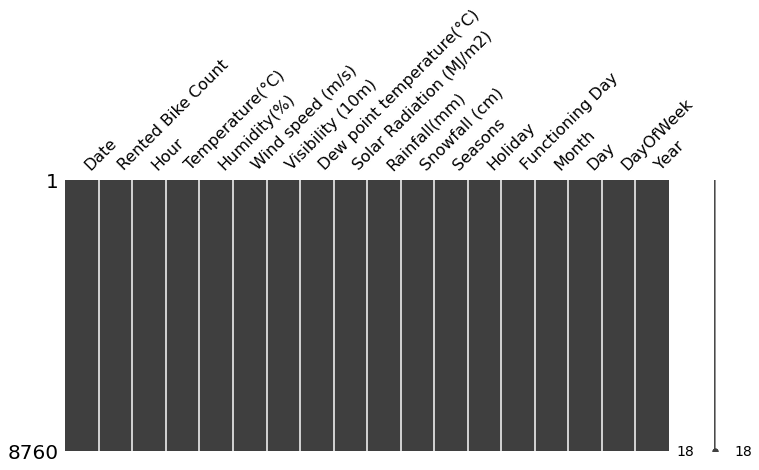

In [13]:
msno.matrix(df,figsize=(12,5))

Once we get hang of the data and columns, next step we geneally is to find out whether we have any missing values in our data. Luckily we dont have any missing value in the dataset. One way which I generally prefer to visualize missing value in the dataset is through "missingno".

Its a quiet handy library to quickly visualize variables for missing values. As I mentioned earlier we got lucky this time as there no missing value in the dataset.

In [14]:
df.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Since we do not have any NaN values, we can use df.describe(). It returns descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution.

### Outlier Analysis

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

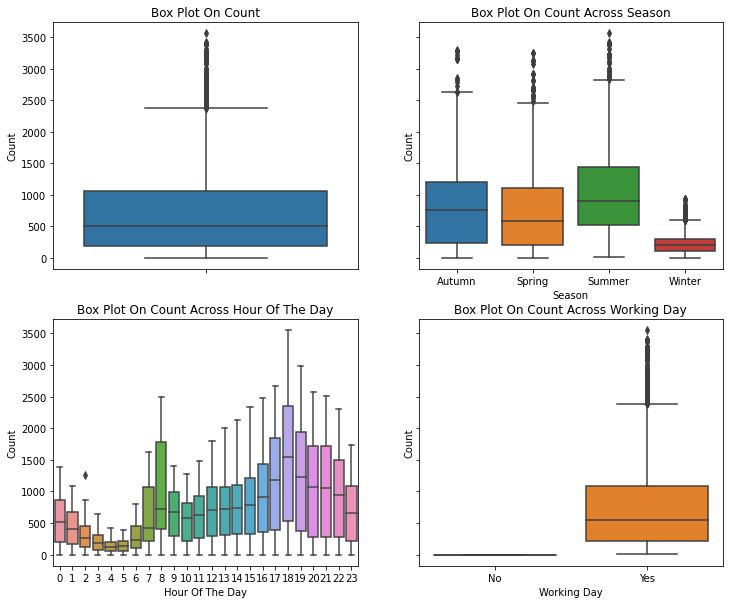

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharey = True)
fig.set_size_inches(12, 10)
sns.boxplot(data = df, y = "Rented Bike Count", orient = "v", ax = axes[0][0])
sns.boxplot(data = df, y = "Rented Bike Count", x = "Seasons", orient = "v", ax = axes[0][1])
sns.boxplot(data = df, y = "Rented Bike Count", x = "Hour", orient = "v", ax = axes[1][0])
sns.boxplot(data = df, y = "Rented Bike Count", x = "Functioning Day", orient = "v", ax = axes[1][1])

axes[0][0].set(ylabel = 'Count', title = "Box Plot On Count")
axes[0][1].set(xlabel = 'Season', ylabel = 'Count', title = "Box Plot On Count Across Season")
axes[1][0].set(xlabel = 'Hour Of The Day', ylabel = 'Count', title = "Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel = 'Working Day', ylabel = 'Count', title = "Box Plot On Count Across Working Day")

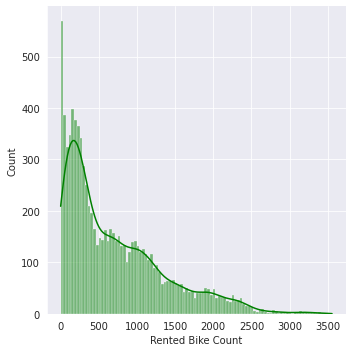

In [16]:
sns.set_style('darkgrid')
sns.displot(df['Rented Bike Count'], bins = 100, color = 'green', kde = True)
plt.show()

At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit). But in addition to that, following inferences can also been made from the simple boxplots given below:

* Winter season has got relatively lower count. The dip in median value in boxplot gives evidence for it.
* The boxplot with "Hour Of The Day" is quiet interesting. The median value are relatively higher at 8AM - 9AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
* Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.

In [17]:
dfWithoutOutliers = df[np.abs(df["Rented Bike Count"] - df["Rented Bike Count"].mean()) <= (3 * df["Rented Bike Count"].std())]

In [18]:
print("Shape Of The Before Ouliers: ", df.shape)
print("Shape Of The After Ouliers: ", dfWithoutOutliers.shape)
print("Proportion removed : {}%".format(100 - (len(dfWithoutOutliers)/len(df) * 100)))

Shape Of The Before Ouliers:  (8760, 18)
Shape Of The After Ouliers:  (8693, 18)
Proportion removed : 0.764840182648399%


Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "Rented Bike Count" vs "Temperature", "Humidity", "Windspeed" and "Rainfall".

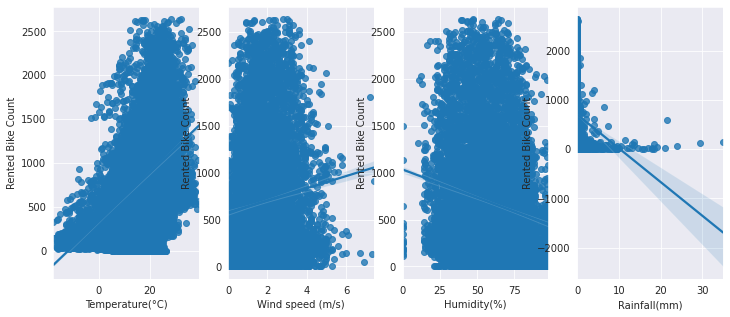

In [19]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4)
fig.set_size_inches(12, 5)
sns.regplot(x = "Temperature(°C)", y = "Rented Bike Count", data = dfWithoutOutliers, ax = ax1)
sns.regplot(x = "Wind speed (m/s)", y = "Rented Bike Count", data = dfWithoutOutliers, ax = ax2)
sns.regplot(x = "Humidity(%)", y = "Rented Bike Count", data = dfWithoutOutliers, ax = ax3)
sns.regplot(x = "Rainfall(mm)", y = "Rented Bike Count", data = dfWithoutOutliers, ax = ax4)

### Distribution of data

As it is visible from the below figures that "Rented Bike Count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. 

One possible solution is to take log transformation on "Rented Bike Count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



((array([-3.76723208, -3.53963997, -3.41457552, ...,  3.41457552,
          3.53963997,  3.76723208]),
  array([   2,    2,    2, ..., 2635, 2636, 2637])),
 (577.7266981307259, 711.078471064539, 0.9441483018688118))

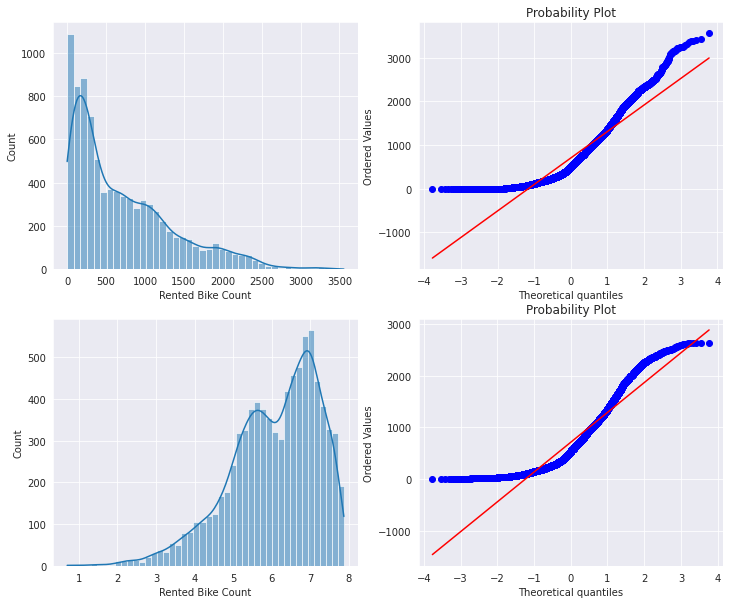

In [20]:
fig, axes = plt.subplots(ncols = 2, nrows = 2)
fig.set_size_inches(12, 10)
sns.histplot(df["Rented Bike Count"], ax = axes[0][0], kde = True)
stats.probplot(df["Rented Bike Count"], dist='norm', fit=True, plot=axes[0][1])
dfWithoutOutliers = dfWithoutOutliers[np.isfinite(np.log(dfWithoutOutliers["Rented Bike Count"]))]
sns.histplot(np.log(dfWithoutOutliers["Rented Bike Count"]), ax = axes[1][0], kde = True)
stats.probplot(dfWithoutOutliers["Rented Bike Count"], dist='norm', fit=True, plot=axes[1][1])

### Discrete features analysis

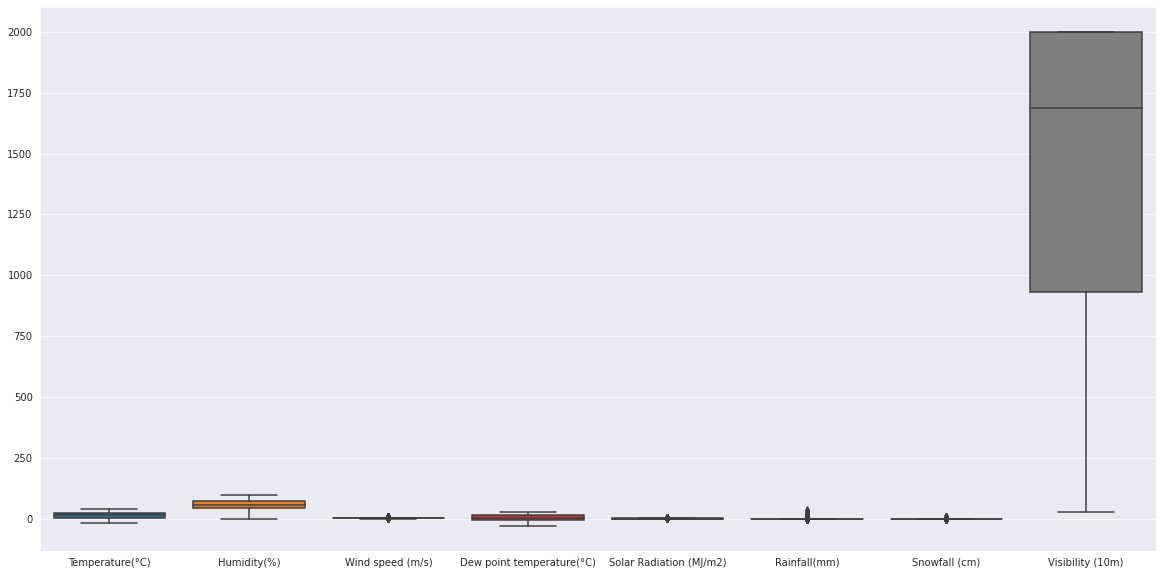

In [21]:
sns.boxplot(data=dfWithoutOutliers[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Visibility (10m)']])
fig=plt.gcf()
fig.set_size_inches(20,10)

Text(0.5, 1.0, 'Variation of snowfall')

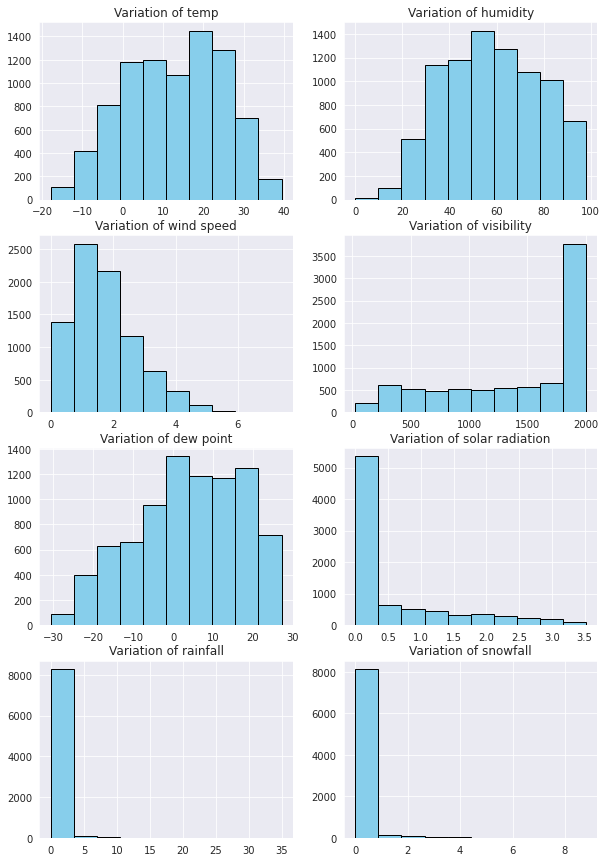

In [22]:
fig,axes = plt.subplots(4, 2, squeeze = False)
fig.set_size_inches(10,15)

axes[0,0].hist(x="Temperature(°C)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[0,0].set_title("Variation of temp")

axes[0,1].hist(x="Humidity(%)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[0,1].set_title("Variation of humidity")

axes[1,0].hist(x="Wind speed (m/s)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[1,0].set_title("Variation of wind speed")

axes[1,1].hist(x="Visibility (10m)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[1,1].set_title("Variation of visibility")

axes[2,0].hist(x="Dew point temperature(°C)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[2,0].set_title("Variation of dew point")

axes[2,1].hist(x = "Solar Radiation (MJ/m2)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[2,1].set_title("Variation of solar radiation")

axes[3,0].hist(x="Rainfall(mm)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[3,0].set_title("Variation of rainfall")

axes[3,1].hist(x="Snowfall (cm)", data = dfWithoutOutliers, edgecolor="black", color='skyblue')
axes[3,1].set_title("Variation of snowfall")



Results show that people tend to rent bikes when meteorological conditions are good. This is quite obvious when you think about it, but now we do have the proove of this assumption.

#### Correlation

One common to understand how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them. Lets plot a correlation plot between "Rented Bike Count" and the discreate values columns.

* **Temperature** and **Humidity** features has got positive and negative correlation with the number of bikes rented respectively. Although the correlation between them are not very prominent still the count variable has got little dependency on "Temperature" and "Humidity".
<br>
* **Windspeed** and **Rainfall** are not gonna be really useful numerical feature and it is visible from their correlation value with "count".

* **Dew point temperature** is a variable which has got a strong correlation with **Temperature**. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

* **Solar Radiation** and **Visibility** have a good correlation with the count of bikes rented, but also with the **Humidity** feature. We'll need to investigate more in these values in order to know if we keep them.

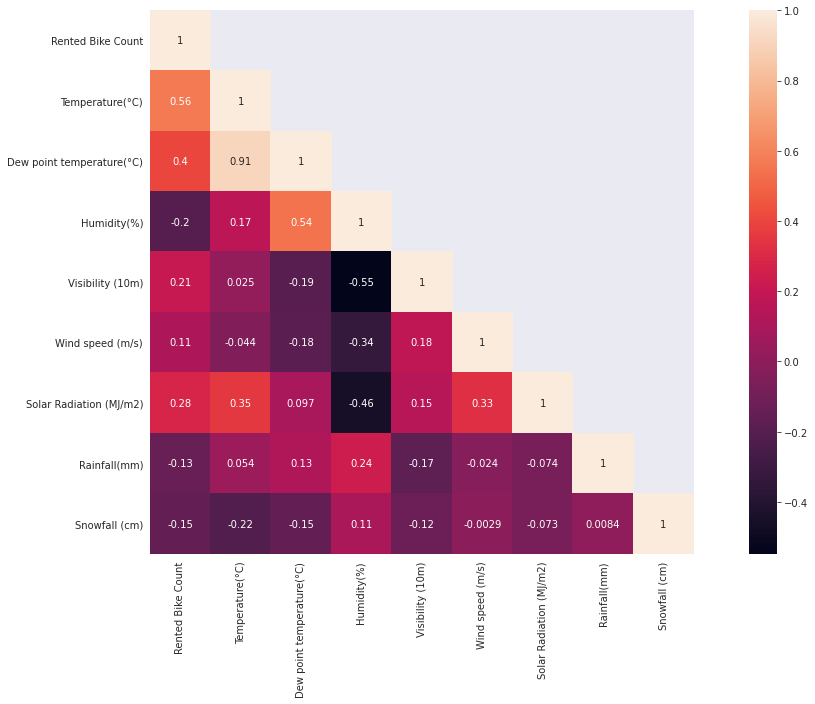

In [23]:
corrMatt = dfWithoutOutliers[["Rented Bike Count", "Temperature(°C)", "Dew point temperature(°C)", "Humidity(%)", "Visibility (10m)", "Wind speed (m/s)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, square = True, annot = True)

### Categorical features analysis

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays')]

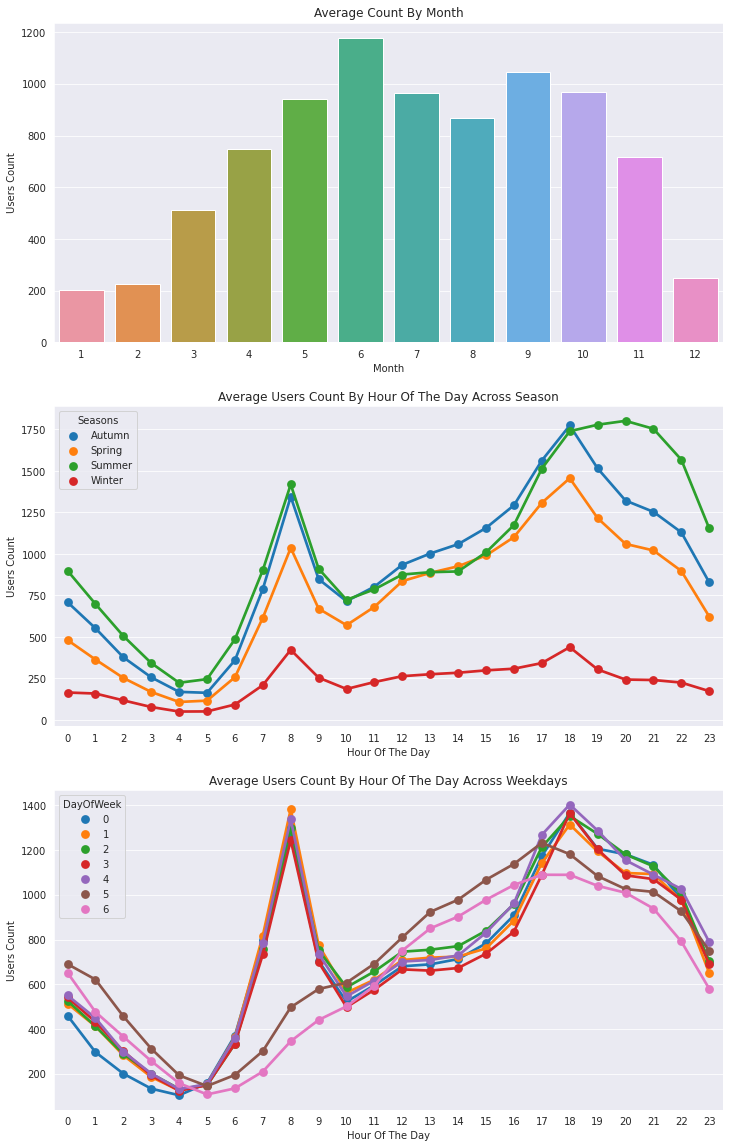

In [24]:
fig,(ax1, ax2, ax3) = plt.subplots(nrows = 3)
fig.set_size_inches(12,20)

monthAggregated = pd.DataFrame(dfWithoutOutliers.groupby("Month")["Rented Bike Count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="Rented Bike Count",ascending=False)
sns.barplot(data = monthSorted, x = "Month", y = "Rented Bike Count", ax = ax1)
ax1.set(xlabel='Month', ylabel = 'Users Count', title = "Average Count By Month")

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(["Hour","Seasons"], sort = True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(data = hourAggregated, x = "Hour", y = "Rented Bike Count", hue = "Seasons", join = True, ax = ax2)
ax2.set(xlabel = 'Hour Of The Day', ylabel = 'Users Count', title = "Average Users Count By Hour Of The Day Across Season")

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(["Hour","DayOfWeek"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(data=hourAggregated, x = "Hour", y = "Rented Bike Count", hue = "DayOfWeek", join = True, ax = ax3)
ax3.set(xlabel = 'Hour Of The Day', ylabel = 'Users Count',title = "Average Users Count By Hour Of The Day Across Weekdays")

Several assumptions can be made thanks to these plots: 

* It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June and July has got relatively higher demand for bicycle.

* On weekdays more people tend to rent bicycle around 6AM - 9AM and 5PM - 7PM. As we mentioned earlier this can be attributed to regular school and office commuters.

* Above pattern is not observed on "Saturday" and "Sunday". More people tend to rent bicycle between 10AM and 4PM.

In [25]:
bike_data = go.Scatter(x = dfWithoutOutliers.Date, y = df['Rented Bike Count'])
layout = go.Layout(title = 'Bikes Rented  Plot', xaxis = dict(title = 'Date'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [bike_data], layout=layout)
fig.show(renderer="colab")

In [26]:
dfWithoutOutliers.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,DayOfWeek,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,2017


## Feature Engineering 

According to our previous assumptions: here's our final dataset:

In [27]:
final_df = dfWithoutOutliers.copy()

seasons_df = pd.get_dummies(final_df['Seasons'], prefix = 's', drop_first = True)
holiday_df = pd.get_dummies(final_df['Holiday'], prefix = 'H', drop_first = True)
functioning_df = pd.get_dummies(final_df['Functioning Day'], prefix = 'f', drop_first = True)


final_df = final_df.join(seasons_df)
final_df = final_df.join(holiday_df)
final_df = final_df.join(functioning_df)

final_df.drop('Date', inplace=True, axis = 1)

final_df.drop(['Seasons', 'Holiday', 'Functioning Day'], inplace = True, axis = 1)
final_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,DayOfWeek,Year,s_Spring,s_Summer,s_Winter,H_No Holiday,f_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,4,2017,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,4,2017,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,4,2017,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,4,2017,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,4,2017,0,0,1,1,1


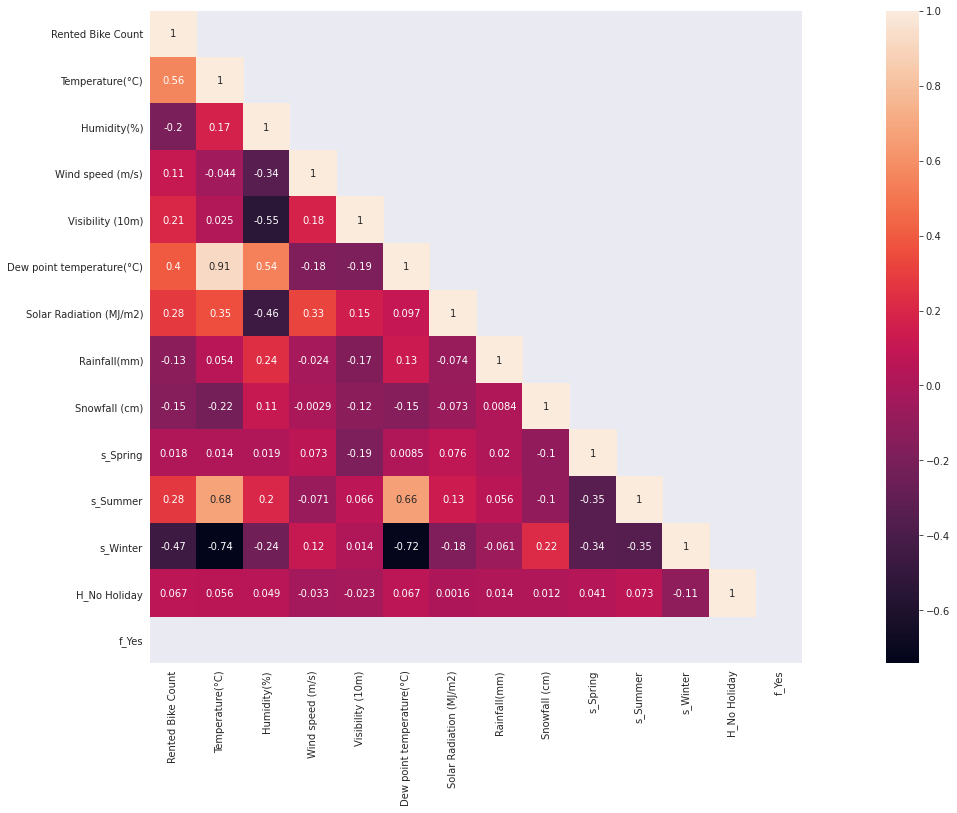

In [28]:
cor_mat= final_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [29]:
x = final_df.drop('Rented Bike Count', axis = 1)
y = np.log1p(final_df['Rented Bike Count'])

## Model creation

We split the data into train and test, with a 70/30 proportion.

For the predictions, we'll first create a baseline, without fine-tuning. Then, we'll model our data with a RandomForest Regressor and a Boosted Tree Regressor, which we'll fine-tune thanks to GridSearchCV.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [31]:
score = dict()

#### Our baseline

As a baseline, we build a simple Linear Regression to predict our Bike Rental. Then, all the others methods can be compared to this baseline.

In [32]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

In [33]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
score['Linear Regression'] = np.sqrt(mean_squared_error(y_test, pred))

RMSE: 0.7085145350127378


#### Decision Tree

Decision trees model data as a "tree" of hierarchical branches. They make branches until they reach "leaves" that represent predictions.

![Decision Tree](https://elitedatascience.com/wp-content/uploads/2017/06/Decision-Tree-Example.jpg)

Due to their branching structure, decision trees can easily model nonlinear relationships.

For example, let's say for Single Family homes, larger lots command higher prices.
However, let's say for Apartments, smaller lots command higher prices (i.e. it's a proxy for urban / rural).
This reversal of correlation is difficult for linear models to capture unless you explicitly add an interaction term (i.e. you can anticipate it ahead of time).
On the other hand, decision trees can capture this relationship naturally.

In [34]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
dt_prediction = dt_reg.predict(X_test)

In [36]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt_prediction)))
score['Decision Tree'] = np.sqrt(mean_squared_error(y_test, dt_prediction))

RMSE: 0.4988788226591363


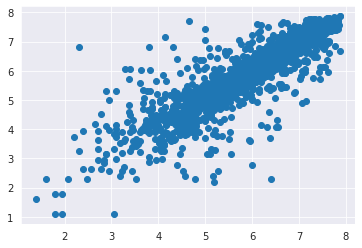

In [37]:
plt.scatter(y_test, dt_prediction)

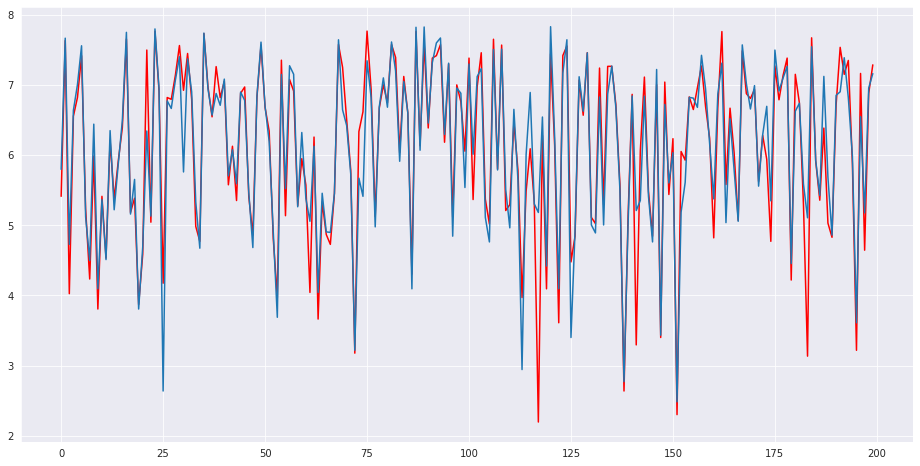

In [38]:
plt.figure(figsize=(16,8))
plt.plot(dt_prediction[0:200],'r')
plt.plot(y_test[0:200].values)

Unfortunately, decision trees suffer from a major flaw as well. If you allow them to grow limitlessly, they can completely "memorize" the training data, just from creating more and more and more branches.

**As a result, individual unconstrained decision trees are very prone to being overfit.​**

#### Random Forest Regressor

Random forests train a large number of "strong" decision trees and combine their predictions through bagging.

In addition, there are two sources of "randomness" for random forests:

1. Each tree is only allowed to choose from a random subset of features to split on (leading to feature selection).
2. Each tree is only trained on a random subset of observations (a process called resampling).

In practice, random forests tend to perform very well right out of the box.

* They often beat many other models that take up to weeks to develop.
* They are the perfect "swiss-army-knife" algorithm that almost always gets good results.
* They don’t have many complicated parameters to tune.

In [39]:
estimator = RandomForestRegressor()
rf_params = {'n_estimators' : np.arange(25,150,25), 'max_depth' : np.arange(1,11,2), 'min_samples_leaf' : np.arange(2,15,3)}

gs_rf = GridSearchCV(estimator, rf_params, cv = 3)
gs_rf.fit(X_train, y_train)
b = gs_rf.best_params_

In [40]:
RF = RandomForestRegressor(n_estimators = b['n_estimators'], max_depth = b['max_depth'], min_samples_leaf = b['min_samples_leaf'], random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE for the data:', rmse)
score['Random Forest'] = rmse

RMSE for the data: 0.38266160815720196


<BarContainer object of 18 artists>

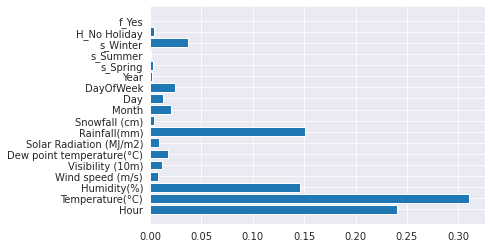

In [41]:
plt.barh(x.columns, RF.feature_importances_)

We can see that we have much less outliers in our predictions. Besides, the difference between real values and predicted ones has shrinked. The value of the RMSE and the graph verifies it.

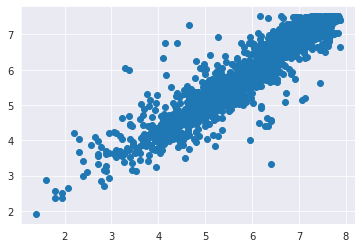

In [42]:
plt.scatter(y_test, y_pred)

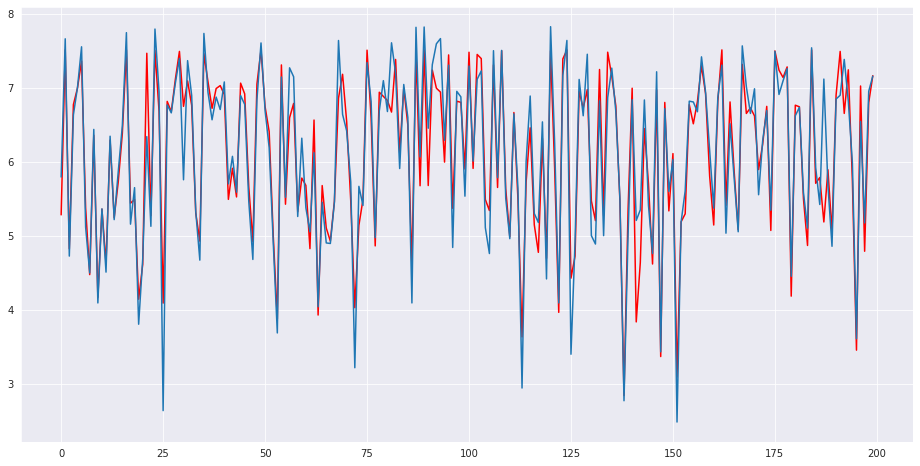

In [43]:
plt.figure(figsize=(16,8))
plt.plot(y_pred[0:200],'r')
plt.plot(y_test[0:200].values)

##### Serializing our Prediction Model

There are several methods of serializing python objects. The most recommended solution is pickling objects. As per Python's official documentation, “ Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

We need to serialize our trained model so that it can be used from our Prediction API. For this demonstration, we won't use the pickle method. Instead we would use the joblib library. With the dump method of joblib, save our model to disk as below.

In [44]:
dump(RF, 'BikeDemandRandomForestRegressor.joblib')

['BikeDemandRandomForestRegressor.joblib']

Now, we load this model back from disk into memory, with the load method. We next test RMSE with this loaded model as before. We find that the saved model has loaded back correctly as we are getting the same testing RMSE as before.

In [45]:
loaded_classifier = load('BikeDemandRandomForestRegressor.joblib')
pred = loaded_classifier.predict(X_test)
np.sqrt(mean_squared_error(pred,y_test))

0.38266160815720196

Test for the prediction in the API

In [46]:
keys = ["Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Month", "Day", "DayOfWeek", "Year", "s_Spring", "s_Summer", "s_Winter", "H_No Holiday", "f_Yes"]
values = [0, -5.2, 37, 2.2, 2000, -17.6, 0.0, 0.0, 0.0, 12, 1, 4, 2017, 0, 0, 1, 1, 1]
X = pd.Series(values, index = keys)
X = X.to_numpy().reshape(1, -1)
print(X)
y_pred = np.expm1(loaded_classifier.predict(X))
y_pred[0]

[[ 0.000e+00 -5.200e+00  3.700e+01  2.200e+00  2.000e+03 -1.760e+01
   0.000e+00  0.000e+00  0.000e+00  1.200e+01  1.000e+00  4.000e+00
   2.017e+03  0.000e+00  0.000e+00  1.000e+00  1.000e+00  1.000e+00]]


164.67685666202397

### Boosted Tree Regressor

In [47]:
ar = AdaBoostRegressor(base_estimator = RF, random_state = 0)
ar_params = {'n_estimators' : np.arange(25, 200, 25)}

gs_ar = GridSearchCV(ar, ar_params,cv = 3)
gs_ar.fit(X_train, y_train)
c = gs_ar.best_params_

In [48]:
ab_rf = AdaBoostRegressor(base_estimator=RF, n_estimators = c['n_estimators'], random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE for the data:', rmse)
score['Ada Boost Regressor'] = rmse

RMSE for the data: 0.37074816015775924


<BarContainer object of 18 artists>

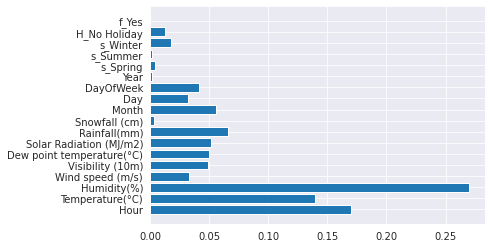

In [49]:
plt.barh(x.columns, ab_rf.feature_importances_)

In [50]:
score

{'Ada Boost Regressor': 0.37074816015775924,
 'Decision Tree': 0.4988788226591363,
 'Linear Regression': 0.7085145350127378,
 'Random Forest': 0.38266160815720196}

Text(0, 0.5, 'RMSE')

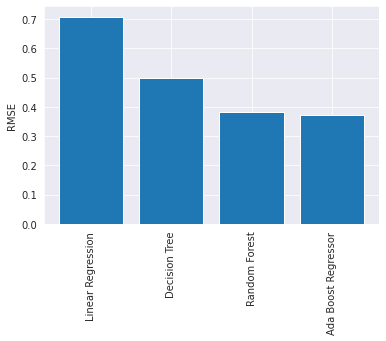

In [51]:
plt.bar(score.keys(), score.values(), align = 'center')
plt.xticks(rotation=90)
plt.ylabel('RMSE')